In [237]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# パッケージの読み込み

In [238]:
#パッケージの読み込みは「import」
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込み

In [239]:
#データの読み込みはPandasの「read_csv()」
data_train = pd.read_csv('../input/titanic/train.csv')
data_test = pd.read_csv('../input/titanic/test.csv')
data_gender_submission = pd.read_csv('../input/titanic/gender_submission.csv')

# EDA（探索的データ分析）

In [240]:
#変数名で実行すれば中身を表示してくれる
#ただし、数が多いと自動で省略される
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [241]:
#出力行数の確認
pd.get_option('display.max_rows')
#全行数の出力
pd.set_option('display.max_rows', 900)

In [242]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [243]:
#データ数が多いと全件表示は時間がかかる
#head()で表示行数を指定（デフォルト5行）
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [244]:
data_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [245]:
#describe()を使えば、主要な統計指標をまとめて確認できる
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [246]:
#データの概要をざっと確認するには「pandas_profiling」が便利
# import pandas_profiling

In [247]:
#実行はpandas.DataFrameの「profile_report()」
# data_train.profile_report()

## 各特徴量と目的変数の関係性を確認

<Axes: xlabel='Pclass', ylabel='count'>

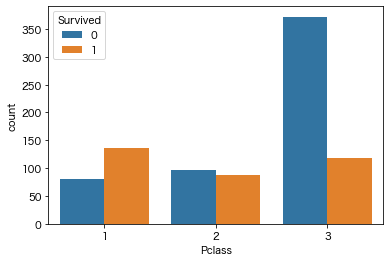

In [248]:
#PclassとSurvivedの件数を棒グラフで可視化
sns.countplot(x='Pclass', hue='Survived', data=data_train)

<Axes: xlabel='Sex', ylabel='count'>

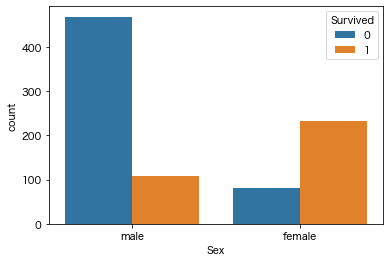

In [249]:
#SexとSurvivedの件数を棒グラフで可視化
sns.countplot(x='Sex', hue='Survived', data=data_train)

<Axes: xlabel='Age', ylabel='count'>

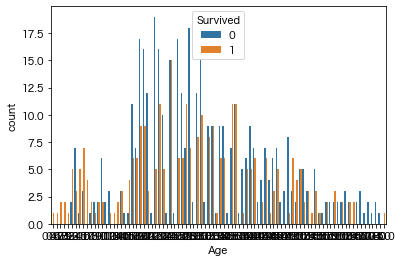

In [250]:
#AgeとSurvivedの件数を棒グラフで可視化
#データ数が多いと非常に見づらい
sns.countplot(x='Age', hue='Survived', data=data_train)

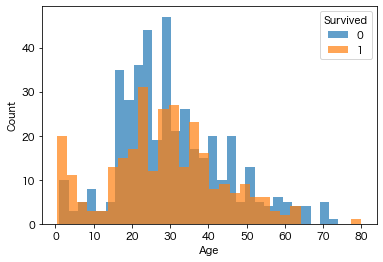

In [251]:
#ヒストグラムで幅を取って確認
plt.hist(data_train.loc[data_train['Survived'] == 0, 'Age'].dropna(), bins=30, alpha=0.7, label='0')
plt.hist(data_train.loc[data_train['Survived'] == 1, 'Age'].dropna(), bins=30, alpha=0.7, label='1')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived')

<Axes: xlabel='SibSp', ylabel='count'>

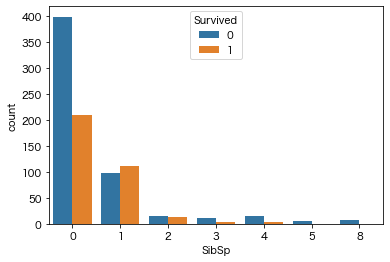

In [252]:
#SibSpとSurvivedの件数を棒グラフで可視化
sns.countplot(x='SibSp', hue='Survived', data=data_train)

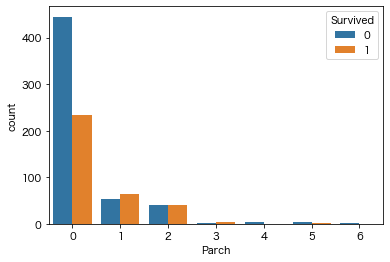

In [253]:
#ParchとSurvivedの件数を棒グラフで可視化
sns.countplot(x='Parch', hue='Survived', data=data_train)
#凡例の位置固定
plt.legend(loc='upper right', title='Survived')

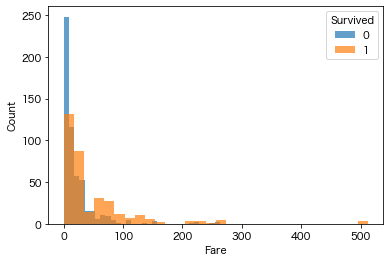

In [254]:
#ヒストグラムで幅を取って確認
#特定の範囲に集まっているときはビンの範囲を指定したほうが見やすい
plt.hist(data_train.loc[data_train['Survived'] == 0, 'Fare'].dropna(), bins=30, alpha=0.7, label='0')
plt.hist(data_train.loc[data_train['Survived'] == 1, 'Fare'].dropna(), bins=30, alpha=0.7, label='1')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend(title='Survived')

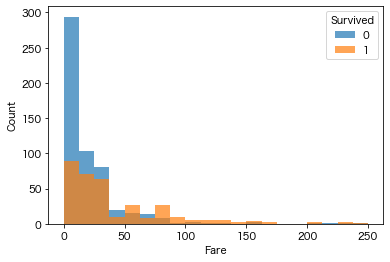

In [255]:
#再確認
#特定の範囲に集まっているときはビンの範囲を指定したほうが見やすい
plt.hist(data_train.loc[data_train['Survived'] == 0, 'Fare'].dropna(), range=(0,250), bins=20, alpha=0.7, label='0')
plt.hist(data_train.loc[data_train['Survived'] == 1, 'Fare'].dropna(), range=(0,250), bins=20, alpha=0.7, label='1')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend(title='Survived')

<Axes: xlabel='Embarked', ylabel='count'>

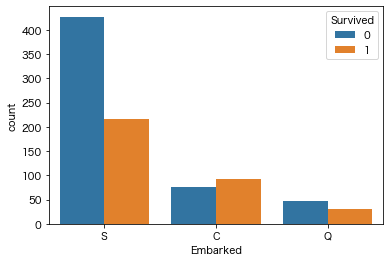

In [256]:
#EmbarkedとSurvivedの件数を棒グラフで可視化
sns.countplot(x='Embarked', hue='Survived', data=data_train)

# 特徴量エンジニアリング

In [257]:
#教師データとテストデータ、双方にエンジニアリングを行うため、一旦ひとつに結合
data_all = pd.concat([data_train, data_test], sort=False)

In [258]:
#各特徴量の欠損値の数を確認
#テストデータは「Survived」がないため欠損値としてカウントされている
data_all.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

# 指針
**①Sexは女性が圧倒的に生存率が高いため、男性と女性別々の特徴量に分けてみる  
②ParchとSibSpはどちらも家族構成の特徴量であり、人数に応じて生存率が変わることから、2つを組み合わせた特徴量を作ってみる  
③Ageは年代差が大きいため、平均に標準偏差を加えてばらつきを考慮する**

In [259]:
#Sexの値を男性・女性で分ける
data_all['Sex_male'] = data_all['Sex'].replace(['male', 'female'], [1, 0])
data_all['Sex_female'] = data_all['Sex'].replace(['male', 'female'], [0, 1])
data_all['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Sex_female
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,0


<Axes: xlabel='Families', ylabel='count'>

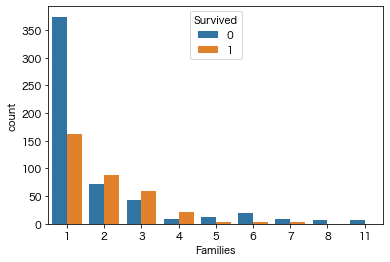

In [260]:
#ParchとSibSpを合わせた特徴量を作成
data_all['Families'] = data_all['Parch'] + data_all['SibSp'] + 1
data_train['Families'] = data_all['Families'][:len(data_train)]
data_test['Families'] = data_all['Families'][len(data_train):]
sns.countplot(x='Families', data=data_train, hue='Survived')

In [261]:
#1がずば抜けて多いため、別の特徴量として抜き出す
data_all['Alone'] = 0
data_all.loc[data_all['Families'] == 1, 'Alone'] = 1
data_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Sex_female,Families,Alone
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0,1,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0,1,2,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,0,1,1


In [262]:
ave = data_all['Age'].mean()
std = data_all['Age'].std()
#「平均±標準偏差」間の値からランダムで選ばれた値で補完
data_all['Age'].fillna(np.random.randint(ave - std, ave + std), inplace=True)
data_all.head()
#乱数なので再現性がないという欠点がある
#年齢は若い人から高齢者まで幅広いため、中央値で補完するのも手
#data_all['Age'].fillna(data_all['Age'].median(), inplace=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Sex_female,Families,Alone
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0,1,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,0,1,2,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1,0,1,1


In [263]:
#Embarkedの欠損値を補完し、数値に置き換える
data_all['Embarked'].fillna('S', inplace=True)
data_all['Embarked'] = data_all['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [264]:
#LightGBMはカテゴリ変数を数値に置き換えなくても処理してくれる
categorical_features = ['Sex', 'Embarked', 'Pclass']
# categorical_features = ['Sex', 'Embarked']

In [265]:
#影響の少なそうな特徴量は一旦削除する
drop_columns = ['PassengerId', 'Name', 'Ticket', 'Cabin']
data_all.drop(drop_columns, axis=1, inplace=True)

In [266]:
#再確認
data_all.isnull().sum()

Survived      418
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            1
Embarked        0
Sex_male        0
Sex_female      0
Families        0
Alone           0
dtype: int64

In [267]:
#Fareの欠損値を平均値で補完する
data_all['Fare'].fillna(np.mean(data_all['Fare']), inplace=True)

In [268]:
#結合したデータを、再度教師データとテストデータに分離
data_train = data_all[:len(data_train)]
data_test = data_all[len(data_train):]

# モデル作成

In [269]:
#アルゴリズムに投入するため、特徴量と目的変数を分離
y_data_train = data_train['Survived']
X_data_train = data_train.drop('Survived', axis=1)
X_data_test = data_test.drop('Survived', axis=1)

In [270]:
#学習用データと検証用データに分割する
from sklearn.model_selection import train_test_split

X_data_train, X_data_valid, y_data_train, y_data_valid = train_test_split(X_data_train, y_data_train, test_size=0.3, random_state=0, stratify=y_data_train)

In [271]:
#LightGBMをインポートしてモデル作成
import lightgbm as lgb
# categorical_features = ['Sex', 'Sex_male', 'Sex_female', 'Embarked', 'Pclass']

# lgb_data_train = lgb.Dataset(X_data_train, y_data_train, categorical_feature=categorical_features)
# lgb_data_eval = lgb.Dataset(X_data_valid, y_data_valid, reference=lgb_data_train, categorical_feature=categorical_features)
lgb_data_train = lgb.Dataset(X_data_train, y_data_train)
lgb_data_eval = lgb.Dataset(X_data_valid, y_data_valid, reference=lgb_data_train)

params = {
    'objective': 'binary'
}

# model = lgb.train(params, lgb_data_train, valid_sets=lgb_data_eval,
#                  verbose_eval=10,
#                  num_boost_round=1000,
#                  early_stopping_rounds=10)
model = lgb.train(
            params,
            lgb_data_train,
            valid_sets=lgb_data_eval,
            # verbose_eval=10,
#             callbacks=[lgb.log_evaluation(period=100)],
            num_boost_round=1000,
#             early_stopping_rounds=10
#             callbacks=[lgb.early_stopping(10)],
            callbacks=[lgb.log_evaluation(period=100), lgb.early_stopping(10)],
        )

AttributeError: module 'pandas' has no attribute 'Int64Index'

# 予測

In [ ]:
#作成したモデルで予測
y_data_pred = model.predict(X_data_test, num_iteration=model.best_iteration)

In [ ]:
#出力結果は0～1の連続値となる
y_data_pred[:5]

array([0.04818774, 0.5535157 , 0.16425448, 0.06331271, 0.47657105])

In [ ]:
#0.5を上回れば1と予測したとみなす
y_data_pred = (y_data_pred > 0.5).astype(int)
y_data_pred[:5]

array([0, 1, 0, 0, 0])

# Submit

In [ ]:
#予測結果をSubmit用のcsvとして作成
submit = data_gender_submission
submit['Survived'] = list(map(int, y_data_pred))
submit.to_csv('lightgbm_submit.csv', index=False)